In [1]:
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.io import fits
from astropy import wcs
from astropy.table import Table
import pandas as pd

## Read tables

In [2]:
cat = Table.read('./data/4/dmu26_XID+MIPS_SPIRE-NEP_cat.fits')

In [3]:
cat[:10]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J174025.417+684835.714,265.105902876941,68.8099204362451,28.077917,40.18007,15.761656,2.6469126,4.9711653e-06,0.9997422,1086.0,1.0
HELP_J174022.766+684839.353,265.094860056941,68.8109313862451,104.62864,118.209305,91.06474,2.6469126,4.9711653e-06,0.99973947,1325.0,0.0
HELP_J174045.700+684838.549,265.190415006941,68.8107079862451,791.2091,799.17896,783.36304,2.6553843,4.9953483e-06,nan,1137.0,1.0
HELP_J174107.472+684944.285,265.281135126941,68.8289680462451,0.6294035,1.5587283,0.18753357,2.6487827,5.188393e-06,nan,2000.0,0.996
HELP_J174107.090+684956.113,265.279540076941,68.8322535362451,0.7732246,1.8341007,0.2031018,2.6487827,5.188393e-06,nan,2000.0,0.633
HELP_J174106.372+684923.917,265.27654936694097,68.8233102362451,1.0806952,2.6539407,0.30152187,2.6487827,5.188393e-06,nan,2000.0,0.959
HELP_J174102.598+684909.321,265.260825846941,68.8192558362451,0.9249326,2.4398484,0.2234823,2.6487827,5.188393e-06,nan,2000.0,0.666
HELP_J174113.520+685022.720,265.306333326941,68.8396444362451,1.6002395,3.6738312,0.48916787,2.6487827,5.188393e-06,nan,2000.0,0.694


In [5]:
SPIRE_cat=cat

## Look at Symmetry of PDFs to determine depth level of catalogue

3.37847


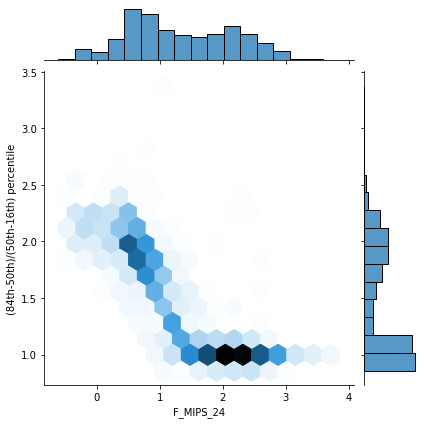

In [6]:
import seaborn as sns
skew=(SPIRE_cat['FErr_MIPS_24_u']-SPIRE_cat['F_MIPS_24'])/(SPIRE_cat['F_MIPS_24']-SPIRE_cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(SPIRE_cat['F_MIPS_24'][use]),y=skew[use], kind='hex')
print(np.max(skew[use]))

g.savefig('../../data/figs/sk_MIPS_SPIRE-NEP.pdf', bbox='tight')
g.savefig('../../data/figs/sk_MIPS_SPIRE-NEP.png', bbox='tight')

Both seem to have flux pdfs that become Gaussian at ~20$\mathrm{\mu Jy}$ 

In [6]:
10**1.3

19.952623149688797

## Add flag to catalogue

In [7]:
from astropy.table import Column
SPIRE_cat.add_column(Column(np.zeros(len(SPIRE_cat), dtype=bool),name='flag_mips_24'))


In [8]:
ind_SPIRE=(SPIRE_cat['Pval_res_24']>0.5) | (SPIRE_cat['F_MIPS_24'] < 20.0)

In [9]:
SPIRE_cat['flag_mips_24'][ind_SPIRE]=True


In [10]:
SPIRE_cat.write('./data/dmu26_XID+MIPS_SPIRE-NEP_cat_20191107.fits', format='fits',overwrite=True)

### Check Map


In [11]:
from astropy.io import fits
import pylab as plt

In [12]:
MIPS_pval=fits.open('./data/4/dmu26_XID+MIPS_SPIRE-NEP_Bayes_Pval.fits')


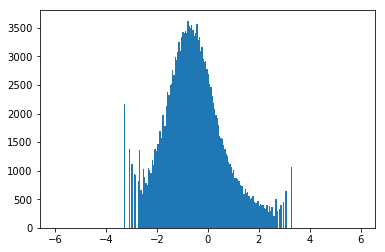

In [13]:
plt.hist(MIPS_pval[1].data[np.isfinite(MIPS_pval[1].data)],bins=np.arange(-6,6,0.05));

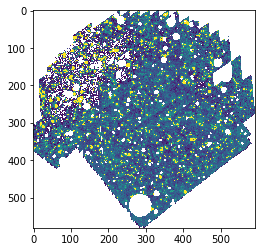

In [14]:
plt.imshow(MIPS_pval[1].data)